<a href="https://colab.research.google.com/github/ChiaHouTan/carParkingDetectSpace/blob/main/testingCarParkDetecter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ChiaHouTan/carParkingDetectSpace.git

Cloning into 'carParkingDetectSpace'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 2.85 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import csv

x1_list, x2_list, y1_list, y2_list = [], [], [], []
csv_file_path = '/content/carParkingDetectSpace/allXY.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        x1_list.append(float(row['x1']))  # assuming x1 is a numeric column
        x2_list.append(float(row['x2']))
        y1_list.append(float(row['y1']))
        y2_list.append(float(row['y2']))

print("x1_list:", x1_list)
print("x2_list:", x2_list)
print("y1_list:", y1_list)
print("y2_list:", y2_list)

x1_list: [151.0, 178.0, 205.0, 232.0, 259.0, 286.0, 312.0, 352.0, 379.0, 406.0, 433.0, 460.0, 487.0, 514.0, 541.0, 580.0, 607.0, 634.0, 661.0, 688.0, 715.0, 742.0, 769.0, 808.0, 835.0, 862.0, 889.0, 916.0, 943.0, 232.0, 259.0, 286.0, 313.0, 352.0, 379.0, 406.0, 433.0, 460.0, 487.0, 514.0, 541.0, 580.0, 607.0, 634.0, 661.0, 688.0, 715.0, 742.0, 769.0, 808.0, 835.0, 862.0, 232.0, 259.0, 286.0, 313.0, 352.0, 379.0, 406.0, 433.0, 460.0, 487.0, 514.0, 541.0, 580.0, 607.0, 634.0, 661.0, 688.0, 715.0, 742.0, 769.0, 808.0, 835.0, 862.0, 151.0, 178.0, 205.0, 232.0, 259.0, 286.0, 312.0, 352.0, 379.0, 406.0, 433.0, 460.0, 487.0, 514.0, 541.0, 580.0, 607.0, 634.0, 661.0, 688.0, 715.0, 742.0, 769.0, 808.0, 835.0, 862.0, 889.0, 916.0, 943.0, 198.0, 224.5, 251.0, 277.5, 304.0, 330.5, 357.0, 383.5, 410.0, 436.5, 463.0, 489.5, 516.0, 542.5, 569.0, 595.5, 623.0, 649.5, 676.0, 702.5, 729.0, 755.5, 782.0, 808.5, 835.0, 861.5, 888.0, 914.5, 97.0, 124.0, 151.0, 178.0, 205.0, 247.0, 316.0, 385.0, 465.0, 492.

rectangle A [0] is free ( 0 )
rectangle A [1] is free ( 0 )
rectangle A [2] is free ( 0 )
rectangle A [3] is free ( 0 )
rectangle A [4] is free ( 0 )
rectangle A [5] is free ( 0 )
rectangle A [6] is free ( 0 )
rectangle A [7] is free ( 0 )
rectangle A [8] is free ( 6 )
rectangle A [9] is taken ( 33 )
rectangle A [10] is free ( 0 )
rectangle A [11] is free ( 0 )
rectangle A [12] is free ( 0 )
rectangle A [13] is free ( 0 )
rectangle A [14] is free ( 0 )
rectangle A [15] is taken ( 35 )
rectangle A [16] is free ( 0 )
rectangle A [17] is taken ( 15 )
rectangle A [18] is free ( 0 )
rectangle A [19] is taken ( 10 )
rectangle A [20] is taken ( 36 )
rectangle A [21] is free ( 0 )
rectangle A [22] is free ( 0 )
rectangle A [23] is taken ( 163 )
rectangle A [24] is taken ( 14 )
rectangle A [25] is free ( 0 )
rectangle A [26] is free ( 0 )
rectangle A [27] is taken ( 191 )
rectangle A [28] is taken ( 31 )
rectangle A [29] is free ( 0 )
rectangle A [30] is free ( 0 )
rectangle A [31] is free ( 0 

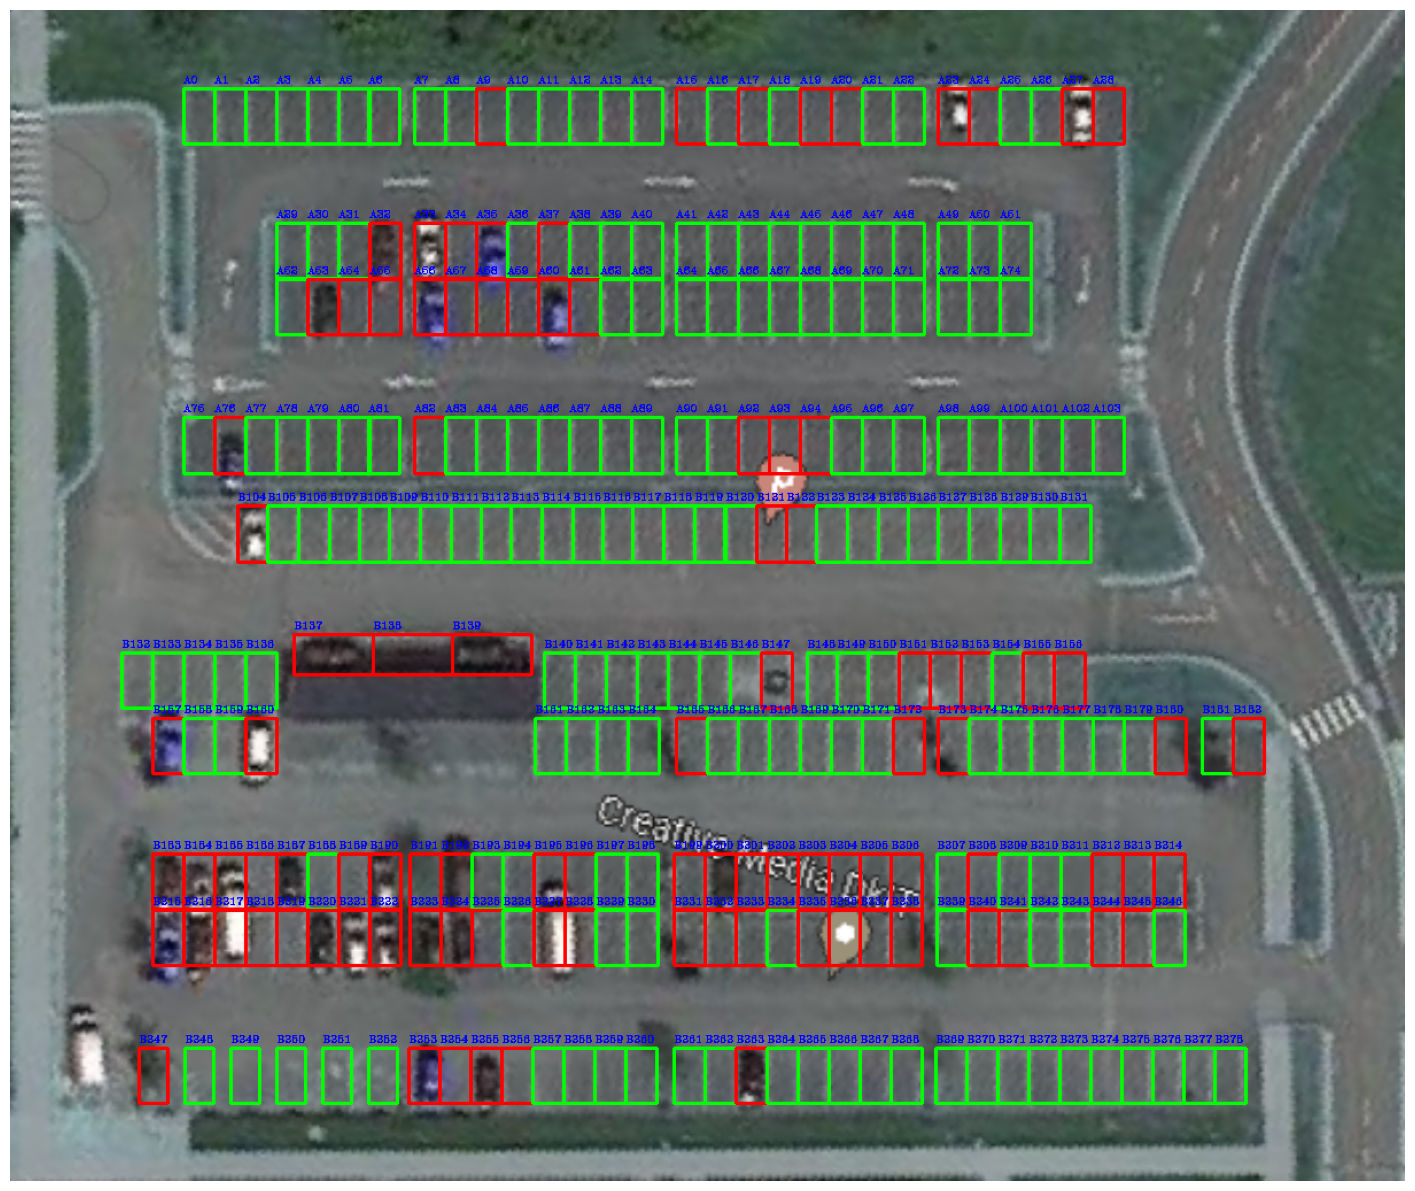

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/carParkingDetectSpace/test.jpg")
lane_image = np.copy(image)
#cv2.imshow("h",image)
# plt.figure(figsize=(18,18))
# plt.imshow(image)
# plt.axis('off')
# plt.show()
idList = []
parkList = []

# gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(3,3), 1)
# blur = cv2.GaussianBlur(gray,(5,5), 0)
lane_image = cv2.Canny(blur, 50, 150)

region_within_rect_top_row = []
for i in range(len(x1_list)): #y1:y1, x1:x2
  region_within_rect_top_row.append(lane_image[round(y1_list[i]):round(y2_list[i]), round(x1_list[i]):round(x2_list[i])])

# region_within_rect_bottom_row = []
# for i in range(len(coordinates_top_row_width)):
#   region_within_rect_bottom_row.append(lane_image[coordinates_bottom_row[0]:coordinates_bottom_row[1], coordinates_top_row_width[i]:coordinates_top_row_height[i]])
A = 'A'
B = 'B'

white_pixel_count = []
for i in range(len(region_within_rect_top_row)):
  white_pixel_count.append(np.count_nonzero(region_within_rect_top_row[i]))
  # print("rectangle A", [i] , white_pixel_count[i])
  if white_pixel_count[i] < 50: #let test with 10, 50, 150 default is 50
    if i >=104:
      cv2.rectangle(image, (round(x1_list[i]), round(y1_list[i])), (round(x2_list[i]), round(y2_list[i])), (0,255,0), thickness = 2)
      cv2.putText(image, 'B'+str(i), (round(x1_list[i]), round(y1_list[i]-5)), cv2.FONT_HERSHEY_COMPLEX,0.3, (0,0,255), 1)
      print("rectangle B", [i] , "is free" , "(", white_pixel_count[i], ")")
      idList.append('B'+str(i))
      parkList.append(True)
    else:
      cv2.rectangle(image, (round(x1_list[i]), round(y1_list[i])), (round(x2_list[i]), round(y2_list[i])), (0,255,0), thickness = 2)
      cv2.putText(image, 'A'+str(i), (round(x1_list[i]), round(y1_list[i]-5)), cv2.FONT_HERSHEY_COMPLEX,0.3, (0,0,255), 1)
      print("rectangle A", [i] , "is free" , "(", white_pixel_count[i], ")")
      idList.append('A'+str(i))
      parkList.append(True)
  else:
    if i >=104:
      cv2.rectangle(image, (round(x1_list[i]), round(y1_list[i])), (round(x2_list[i]), round(y2_list[i])), (255,0,0), thickness = 2)
      cv2.putText(image, 'B'+str(i), (round(x1_list[i]), round(y1_list[i]-5)), cv2.FONT_HERSHEY_COMPLEX,0.3, (0,0,255), 1)
      print("rectangle B", [i] , "is taken" , "(", white_pixel_count[i], ")")
      idList.append('B'+str(i))
      parkList.append(False)
    else:
      cv2.rectangle(image, (round(x1_list[i]), round(y1_list[i])), (round(x2_list[i]), round(y2_list[i])), (255,0,0), thickness = 2)
      cv2.putText(image, 'A'+str(i), (round(x1_list[i]), round(y1_list[i]-5)), cv2.FONT_HERSHEY_COMPLEX,0.3, (0,0,255), 1)
      print("rectangle A", [i] , "is taken" , "(", white_pixel_count[i], ")")
      idList.append('A'+str(i))
      parkList.append(False)

plt.figure(figsize=(18,18))
plt.imshow(image)
plt.axis('off')
plt.show()
#cv2.imshow("test",image)
#cv2_imshow(region_within_rect[2])


In [ ]:
for i in range(0, len(idList)):
     print(idList[i] + ' , ' + str(parkList[i]))

A0 , True
A1 , True
A2 , True
A3 , True
A4 , True
A5 , True
A6 , True
A7 , True
A8 , True
A9 , True
A10 , True
A11 , True
A12 , True
A13 , True
A14 , True
A15 , True
A16 , True
A17 , True
A18 , True
A19 , True
A20 , True
A21 , True
A22 , True
A23 , False
A24 , True
A25 , True
A26 , True
A27 , False
A28 , True
A29 , True
A30 , True
A31 , True
A32 , False
A33 , False
A34 , True
A35 , False
A36 , True
A37 , True
A38 , True
A39 , True
A40 , True
A41 , True
A42 , True
A43 , True
A44 , True
A45 , True
A46 , True
A47 , True
A48 , True
A49 , True
A50 , True
A51 , True
A52 , True
A53 , False
A54 , True
A55 , True
A56 , False
A57 , True
A58 , True
A59 , True
A60 , False
A61 , True
A62 , True
A63 , True
A64 , True
A65 , True
A66 , True
A67 , True
A68 , True
A69 , True
A70 , True
A71 , True
A72 , True
A73 , True
A74 , True
A75 , True
A76 , False
A77 , True
A78 , True
A79 , True
A80 , True
A81 , True
A82 , True
A83 , True
A84 , True
A85 , True
A86 , True
A87 , True
A88 , True
A89 , True
A90 , True


In [ ]:
!pip install pubnub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 990.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.0/242.0 kB 27.4 MB/s eta 0:00:00
  Created wheel for pubnub: filename=pubnub-7.3.2-py3-none-any.whl size=134453 sha256=fce88d8cb477f5fb922e2bf4d2e5742d9cde9d0bed1ca5bc1054568037326fce
  Stored in directory: /root/.cache/pip/wheels/d9/7c/52/2f49f63585f47fe4226f93e9a345cf3193df175241020f4ed3
Successfully built pubnub


In [ ]:
from pubnub.pnconfiguration import PNConfiguration
from pubnub.pubnub import PubNub, SubscribeListener
from pubnub.callbacks import SubscribeCallback
from pubnub.enums import PNStatusCategory, PNOperationType
import pubnub

pnconfig = PNConfiguration()
pnconfig.subscribe_key = ''
pnconfig.publish_key = ''
pnconfig.user_id = ""
pubnub = PubNub(pnconfig)

data = {'id_list': idList, 'boolean_values': parkList}
channel = 'camerav3_channel'

def publish_callback(result, status):
    if status.is_error():
        print(f"Error publishing message: {status.error_data}")
        print(status.statusCode)
    else:
        print("Message published successfully")
        print(result.timetoken)

listener = SubscribeListener()
pubnub.add_listener(listener)
pubnub.subscribe().channels(channel).execute()

listener.wait_for_connect()
print('connected')

pubnub.publish().channel(channel).message(data).pn_async(publish_callback)

result = listener.wait_for_message_on(channel)
print(result.message)

# pubnub.publish().channel(channel).message(message).pn_async(publish_callback)

connected
Message published successfully
17071693979793907
{'id_list': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100', 'A101', 'A102', 'A103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129'